In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('../data/children_products/clildren_product_showcase.csv')
df.head()

,phone,ОбщаяСуммаЗаказов,СредняяСуммаЗаказов,ОбщаяМаржаЗаказов,СредняяМаржаЗаказов,КоличествоТоварныхПозиций,КоличествоЗаказов,ДоляОтменненыхЗаказов,ДоляДоставленныхЗаказов,ОбщаяСуммаТоваров,...,Тип_ИНОЕ,Тип_КГТ,Тип_ОДЕЖДА,Тип_ППКП,МетодДоставки_Групп_Курьерская,МетодДоставки_Групп_Магазины,МетодДоставки_Групп_Пункт выдачи,Гео_МО,Гео_Москва,Гео_Регионы
0,55574854-48574951555577,0.0,0.0,0.00,0.00,0.0,1,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,55575453-56535648535679,4875.0,2437.5,1603.48,801.74,6.0,2,0.0,1.0,16.0,...,0.000000,0.000000,0.250000,0.500000,0.0,1.0,0.0,0.0,0.0,1.0
2,55574950-57515657535772,3325.0,3325.0,2176.00,2176.00,1.0,1,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
3,55574851-55545249535475,9650.0,4825.0,1277.46,638.73,26.0,2,0.0,1.0,75.0,...,0.076923,0.019231,0.038462,0.865385,1.0,0.0,0.0,0.0,1.0,0.0
4,55574854-56495552515179,528.0,528.0,204.07,204.07,4.0,1,0.0,1.0,4.0,...,0.000000,0.000000,0.000000,0.500000,0.0,1.0,0.0,0.0,0.0,1.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114446 entries, 0 to 114445
Columns: 131 entries, phone to Гео_Регионы
dtypes: float64(129), int64(1), object(1)
memory usage: 114.4+ MB


In [91]:
print("Количество пропущенных значений в каждом столбце:")
df.isnull().sum()

Количество пропущенных значений в каждом столбце:


phone                               0
ОбщаяСуммаЗаказов                   0
СредняяСуммаЗаказов                 0
ОбщаяМаржаЗаказов                   0
СредняяМаржаЗаказов                 0
                                   ..
МетодДоставки_Групп_Магазины        0
МетодДоставки_Групп_Пункт выдачи    0
Гео_МО                              0
Гео_Москва                          0
Гео_Регионы                         0
Length: 131, dtype: int64

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, 
    davies_bouldin_score, 
    calinski_harabasz_score
)

In [93]:
X = df.drop(['phone'], axis=1, errors='ignore')
X = X.dropna()

In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [95]:
k_range = range(2, 11)
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X_scaled, labels))

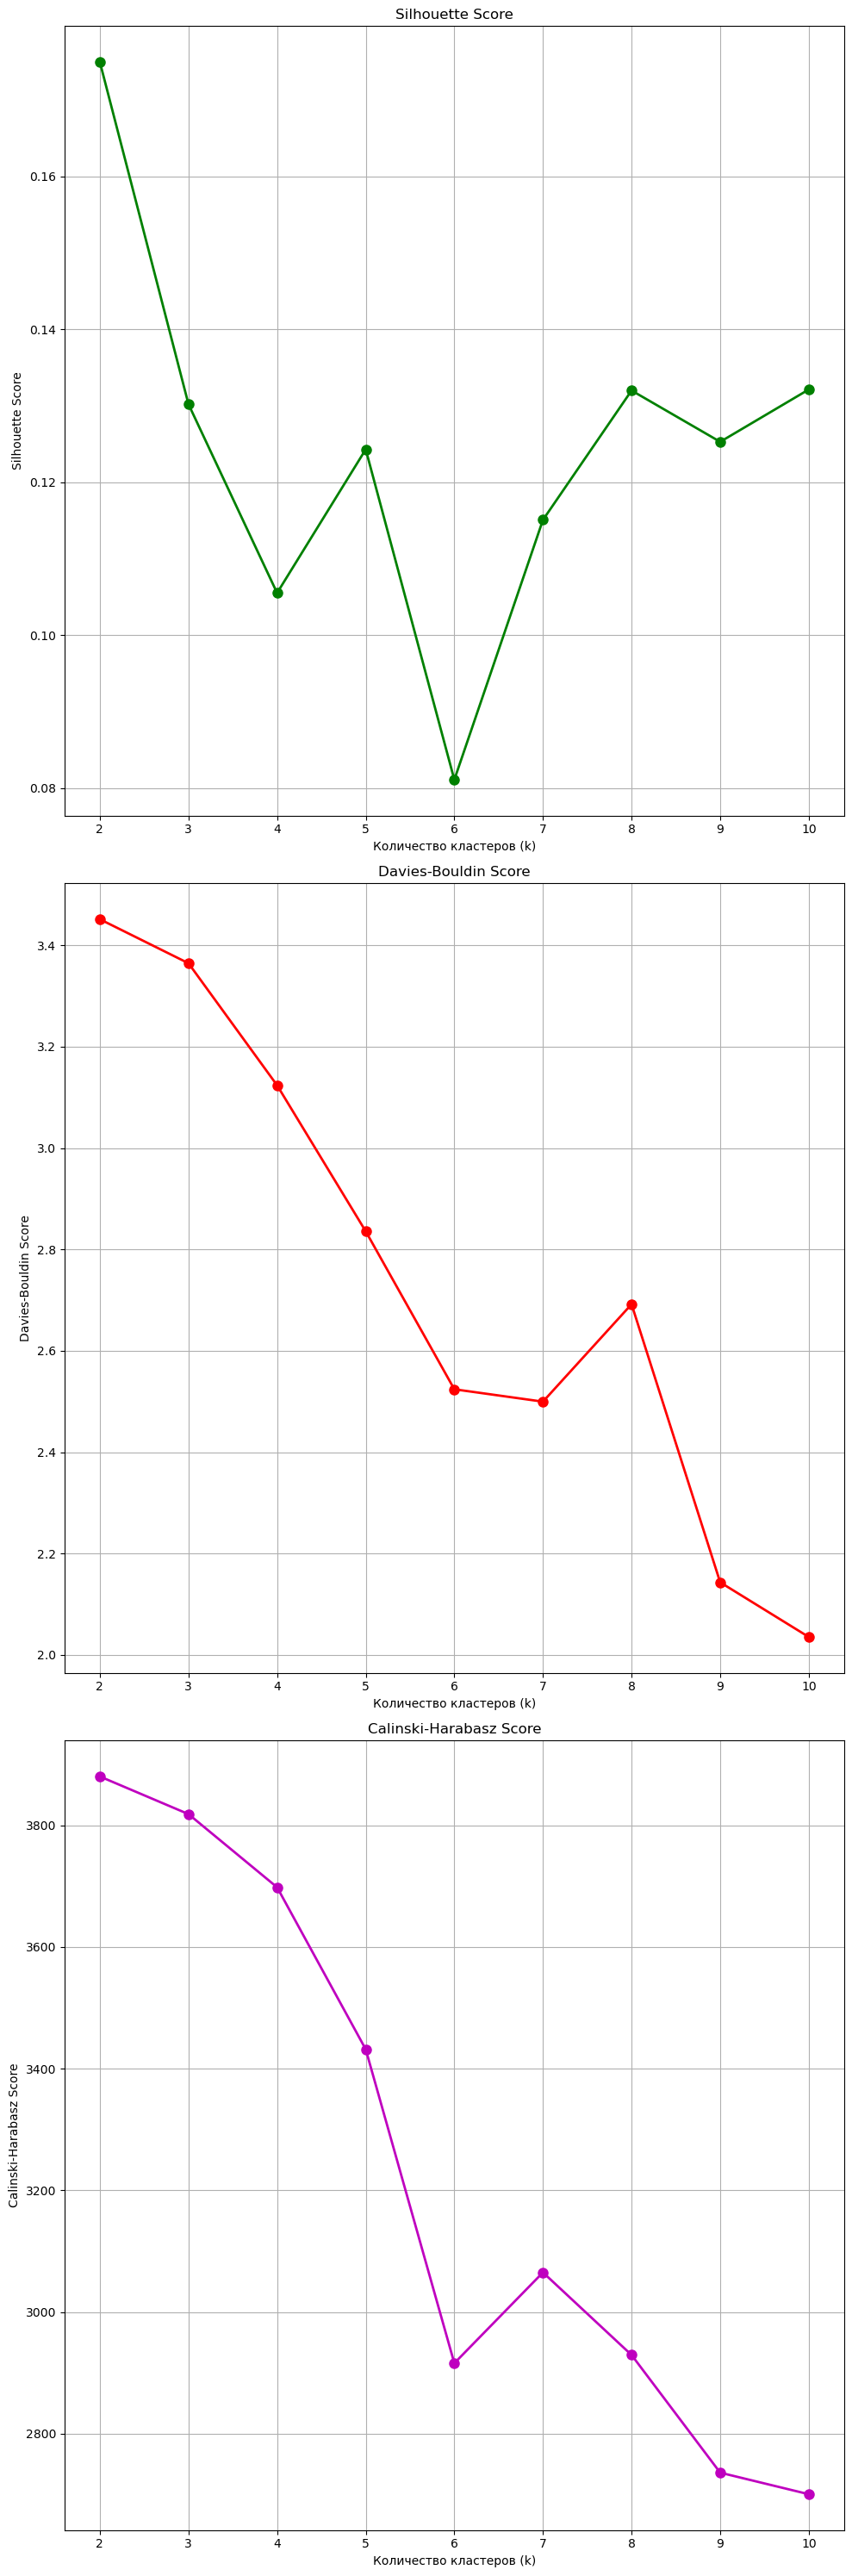

In [96]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30))

axes[0].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0].set_xlabel('Количество кластеров (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score')
axes[0].grid(True)

axes[1].plot(k_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Количество кластеров (k)')
axes[1].set_ylabel('Davies-Bouldin Score')
axes[1].set_title('Davies-Bouldin Score')
axes[1].grid(True)

axes[2].plot(k_range, calinski_harabasz_scores, 'mo-', linewidth=2, markersize=8)
axes[2].set_xlabel('Количество кластеров (k)')
axes[2].set_ylabel('Calinski-Harabasz Score')
axes[2].set_title('Calinski-Harabasz Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [97]:
optimal_k = 7

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

df['kmeans_cluster'] = kmeans_labels

print(f"K-Means с k={optimal_k}")
print(f"Распределение по кластерам:")
print(df['kmeans_cluster'].value_counts().sort_index())
print(f"Метрики качества:")
print(f"Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.2f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, kmeans_labels):.2f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_score(X_scaled, kmeans_labels):.2f}")

K-Means с k=7
Распределение по кластерам:
kmeans_cluster
0    31118
1       68
2    11380
3    13345
4    13895
5    23586
6    21054
Name: count, dtype: int64
Метрики качества:
Silhouette Score: 0.12
Davies-Bouldin Score: 2.50
Calinski-Harabasz Score: 3065.24


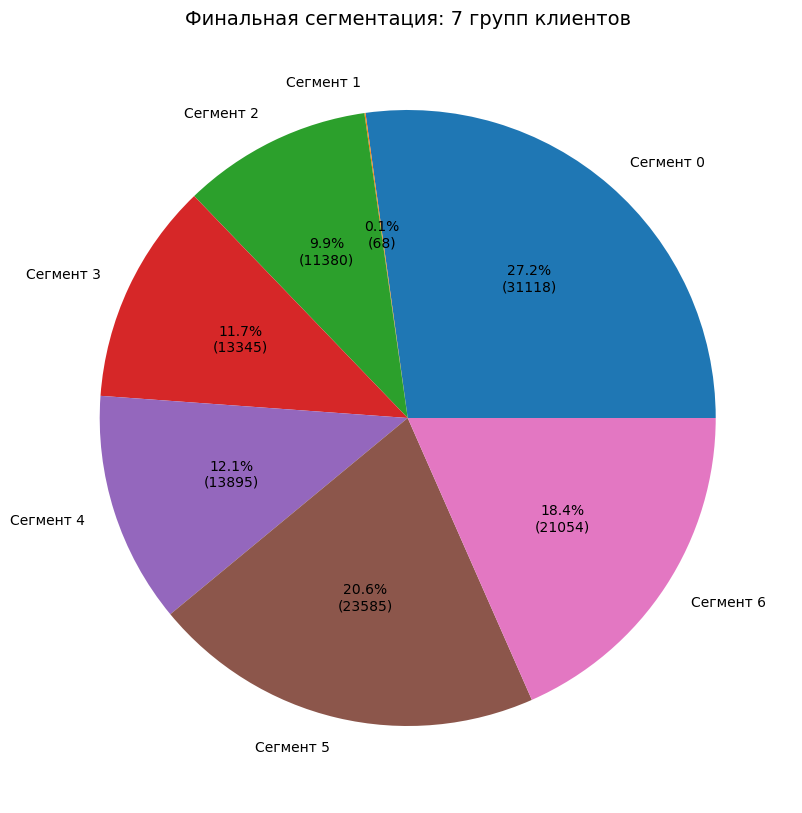

+---+-----------+-------+-------+
| 0 | Сегмент 0 | 31118 | 27.19 |
| 1 | Сегмент 1 |    68 |  0.06 |
| 2 | Сегмент 2 | 11380 |  9.94 |
| 3 | Сегмент 3 | 13345 | 11.66 |
| 4 | Сегмент 4 | 13895 | 12.14 |
| 5 | Сегмент 5 | 23586 | 20.61 |
| 6 | Сегмент 6 | 21054 | 18.4  |
+---+-----------+-------+-------+


In [98]:
from tabulate import tabulate

cluster_counts = df['kmeans_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=[f"Сегмент {i}" for i in cluster_counts.index],
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df)/100)})',
)

plt.title(f'Финальная сегментация: {optimal_k} групп клиентов', fontsize=14)
plt.show()

summary_table = pd.DataFrame({
    'Сегмент': [f"Сегмент {i}" for i in cluster_counts.index],
    'Количество клиентов': cluster_counts.values,
    'Доля (%)': (cluster_counts.values / len(df) * 100).round(2)
})

print(tabulate(summary_table, tablefmt='psql'))

In [99]:
cluster_profile = df.drop(['phone'], axis=1, errors='ignore').groupby('kmeans_cluster').mean().T

cluster_profile.style.background_gradient(cmap='coolwarm', axis=1).format("{:.2f}")

kmeans_cluster,0,1,2,3,4,5,6
ОбщаяСуммаЗаказов,268.25,1907.15,3704.11,7203.37,8033.53,2422.42,3169.46
СредняяСуммаЗаказов,240.48,1725.76,2801.19,3622.10,7404.13,2099.86,2316.19
ОбщаяМаржаЗаказов,74.98,587.54,1225.55,1977.88,2702.09,594.51,470.25
СредняяМаржаЗаказов,69.07,546.26,962.51,1007.99,2515.45,511.00,327.73
КоличествоТоварныхПозиций,0.21,2.48,3.21,8.01,1.21,2.56,2.47
КоличествоЗаказов,1.24,1.46,1.72,2.53,1.27,1.36,1.63
ДоляОтменненыхЗаказов,0.30,0.05,0.06,0.07,0.05,0.05,0.05
ДоляДоставленныхЗаказов,0.11,0.89,0.90,0.91,0.93,0.94,0.92
ОбщаяСуммаТоваров,0.39,3.34,4.65,33.33,1.41,3.42,4.39
КоличествоУникальныхТоваров,0.23,2.79,4.32,13.60,1.31,3.01,3.10


In [100]:
X = df.drop(['phone', 'kmeans_cluster'], axis=1, errors='ignore')
X = X.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [101]:
X.shape

(114446, 130)

In [102]:
bic_scores = []
aic_scores = []
em_silhouette_scores = []

for k in k_range:
    print(f"Calculating: {k}")
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    
    bic_scores.append(gmm.bic(X_scaled))
    aic_scores.append(gmm.aic(X_scaled))
    em_silhouette_scores.append(silhouette_score(X_scaled, labels))


Calculating: 2
Calculating: 3
Calculating: 4
Calculating: 5
Calculating: 6
Calculating: 7
Calculating: 8
Calculating: 9
Calculating: 10


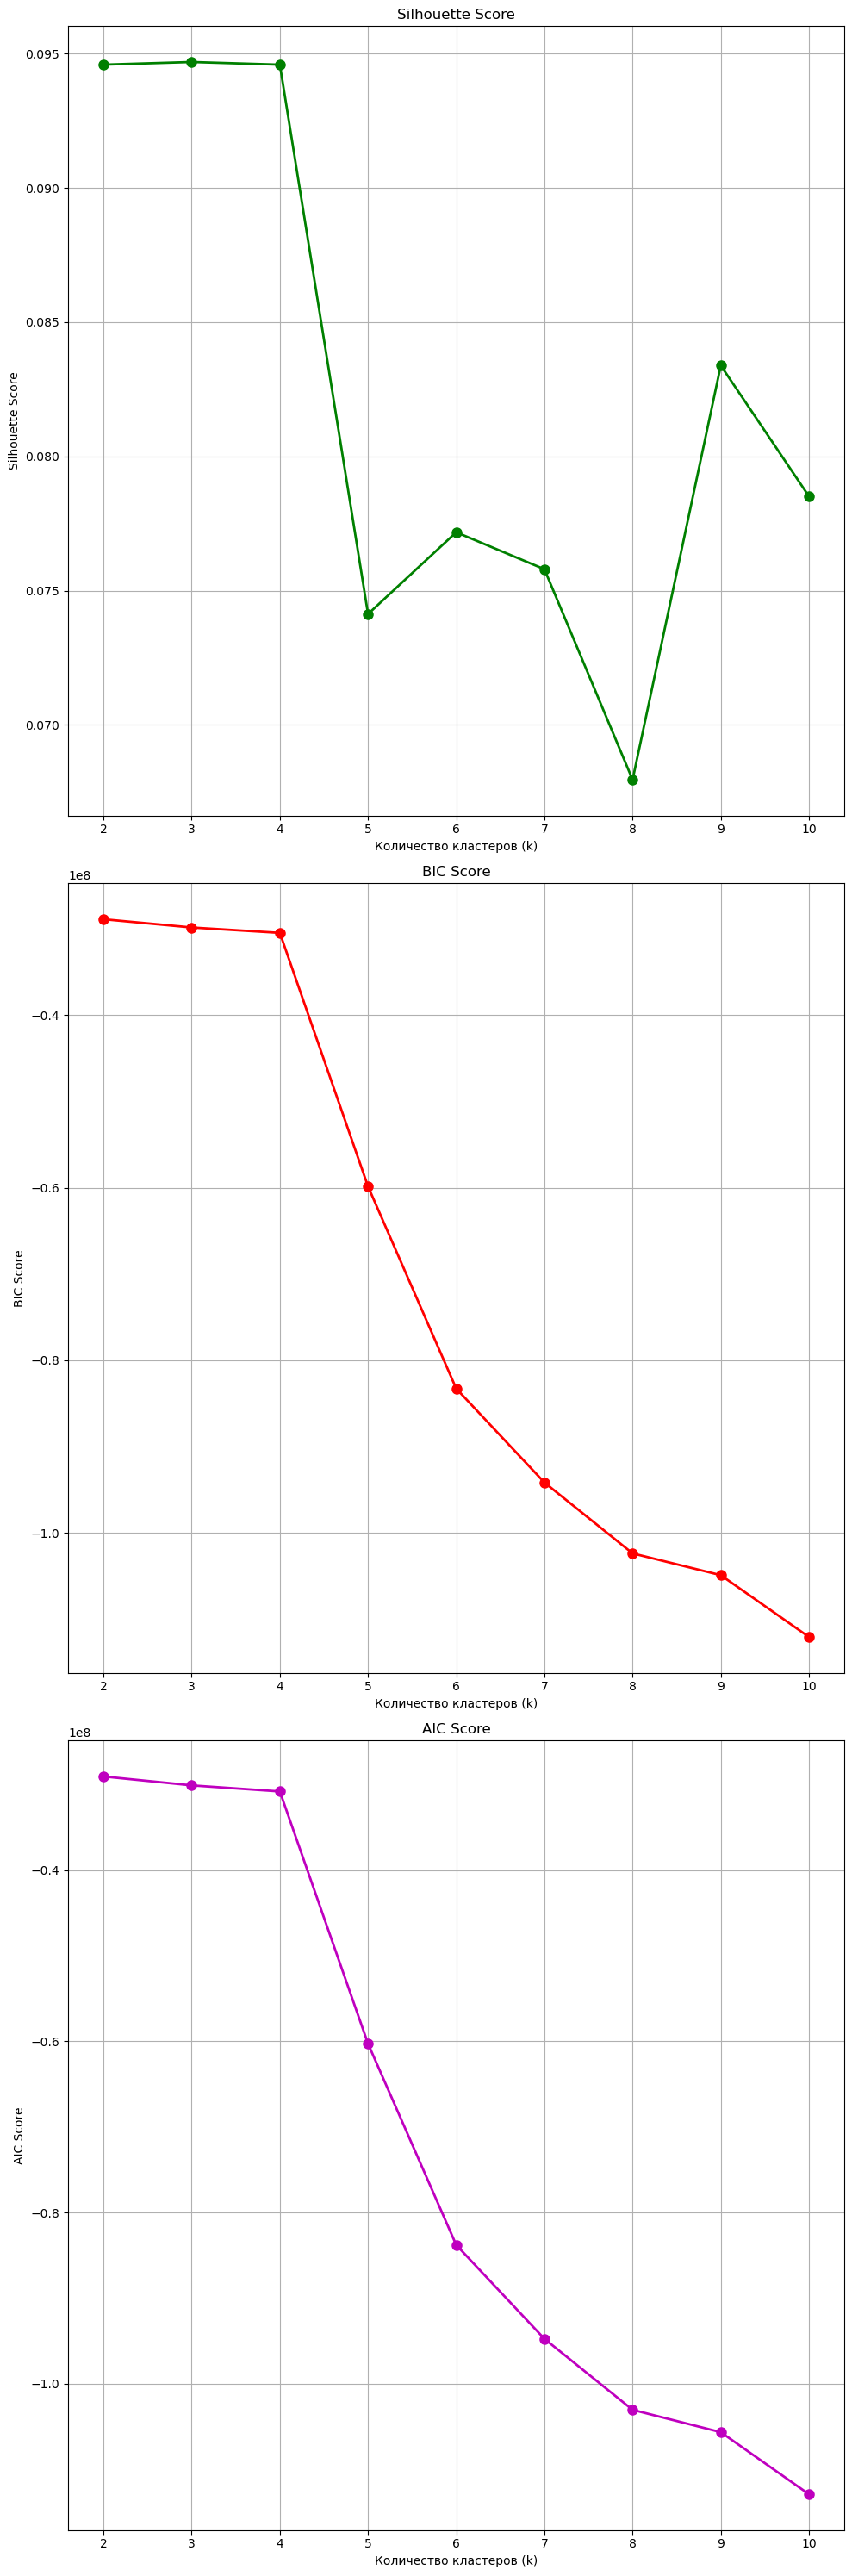

In [103]:
fig, axes = plt.subplots(3, 1, figsize=(10, 30))

axes[0].plot(k_range, em_silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0].set_xlabel('Количество кластеров (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score')
axes[0].grid(True)

axes[1].plot(k_range, bic_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Количество кластеров (k)')
axes[1].set_ylabel('BIC Score')
axes[1].set_title('BIC Score')
axes[1].grid(True)

axes[2].plot(k_range, aic_scores, 'mo-', linewidth=2, markersize=8)
axes[2].set_xlabel('Количество кластеров (k)')
axes[2].set_ylabel('AIC Score')
axes[2].set_title('AIC Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [108]:
optimal_k_em = 9

gmm = GaussianMixture(n_components=optimal_k_em, random_state=42)
em_labels = gmm.fit_predict(X_scaled)

df['em_cluster'] = em_labels

print(f"EM с k={optimal_k_em}")
print("Распределение по кластерам:")
print(df['em_cluster'].value_counts().sort_index())

EM с k=9
Распределение по кластерам:
em_cluster
0    35374
1     3825
2        1
3    29414
4     1407
5       24
6    16912
7    24459
8     3030
Name: count, dtype: int64


Получились минисегменты

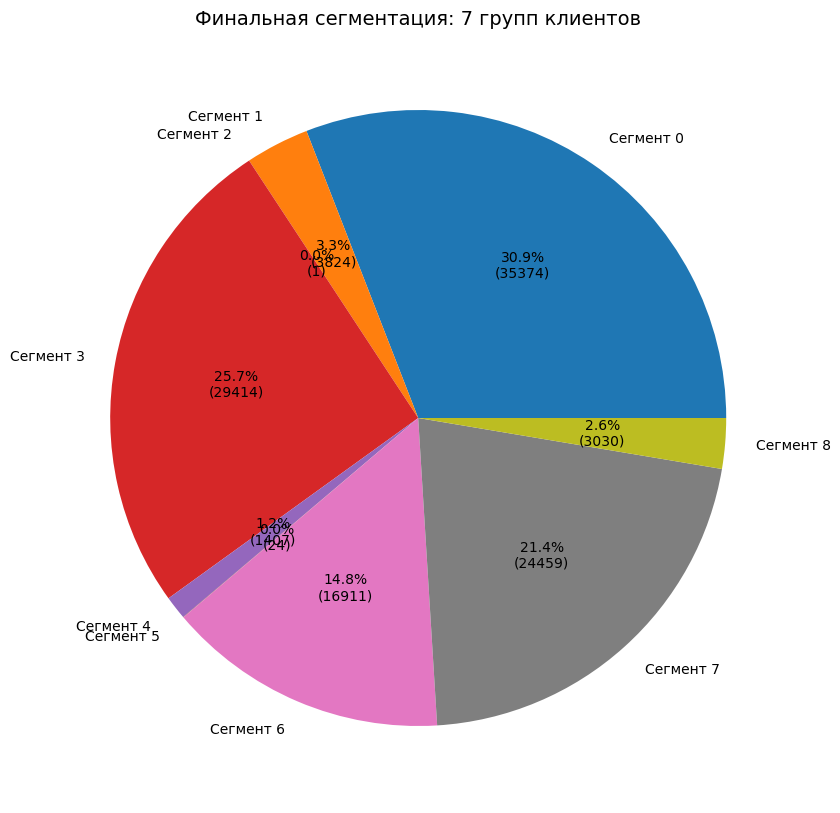

+---+-----------+-------+-------+
| 0 | Сегмент 0 | 35374 | 30.91 |
| 1 | Сегмент 1 |  3825 |  3.34 |
| 2 | Сегмент 2 |     1 |  0    |
| 3 | Сегмент 3 | 29414 | 25.7  |
| 4 | Сегмент 4 |  1407 |  1.23 |
| 5 | Сегмент 5 |    24 |  0.02 |
| 6 | Сегмент 6 | 16912 | 14.78 |
| 7 | Сегмент 7 | 24459 | 21.37 |
| 8 | Сегмент 8 |  3030 |  2.65 |
+---+-----------+-------+-------+


In [109]:
from tabulate import tabulate

cluster_counts = df['em_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=[f"Сегмент {i}" for i in cluster_counts.index],
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df)/100)})',
)

plt.title(f'Финальная сегментация: {optimal_k} групп клиентов', fontsize=14)
plt.show()

summary_table = pd.DataFrame({
    'Сегмент': [f"Сегмент {i}" for i in cluster_counts.index],
    'Количество клиентов': cluster_counts.values,
    'Доля (%)': (cluster_counts.values / len(df) * 100).round(2)
})

print(tabulate(summary_table, tablefmt='psql'))

In [110]:
cluster_profile = df.drop(['phone', 'kmeans_cluster'], axis=1, errors='ignore').groupby('em_cluster').mean().T

cluster_profile.style.background_gradient(cmap='coolwarm', axis=1).format("{:.2f}")

em_cluster,0,1,2,3,4,5,6,7,8
ОбщаяСуммаЗаказов,516.27,4305.75,1372.00,5196.88,11893.74,2188.71,5038.25,2665.03,9068.55
СредняяСуммаЗаказов,516.27,2886.30,1372.00,4634.91,5213.06,1815.79,2929.35,2197.52,4186.28
ОбщаяМаржаЗаказов,152.75,1476.30,382.20,1368.80,6098.61,453.62,1205.24,669.05,2485.75
СредняяМаржаЗаказов,152.75,1107.76,382.20,1247.59,3568.64,338.23,720.59,549.06,1159.60
КоличествоТоварныхПозиций,0.42,4.27,1.00,1.36,9.46,1.17,6.71,2.51,6.50
КоличествоЗаказов,1.22,2.06,1.00,1.40,3.48,1.17,2.10,1.45,2.74
ДоляОтменненыхЗаказов,0.27,0.06,0.00,0.05,0.06,0.04,0.06,0.05,0.06
ДоляДоставленныхЗаказов,0.21,0.91,1.00,0.92,0.90,0.96,0.92,0.93,0.91
ОбщаяСуммаТоваров,0.43,7.66,2.00,2.17,36.15,1.33,22.31,3.37,27.54
КоличествоУникальныхТоваров,0.42,6.35,1.00,1.53,20.01,1.21,9.94,3.01,12.69


HDBSCAN пока странненько

In [121]:
from sklearn.cluster import HDBSCAN


hdbscan_model = HDBSCAN(
    min_cluster_size=2000,
    min_samples=20,
    metric='euclidean',
    n_jobs=-1              
)

labels = hdbscan_model.fit_predict(X_scaled)
df['hdbscan_cluster'] = labels

/opt/homebrew/Caskroom/miniconda/base/envs/data_analysis/lib/python3.11/site-packages/sklearn/cluster/_hdbscan/hdbscan.py:722: FutureWarning: The default value of `copy` will change from False to True in 1.10. Explicitly set a value for `copy` to silence this warning.
  warn(


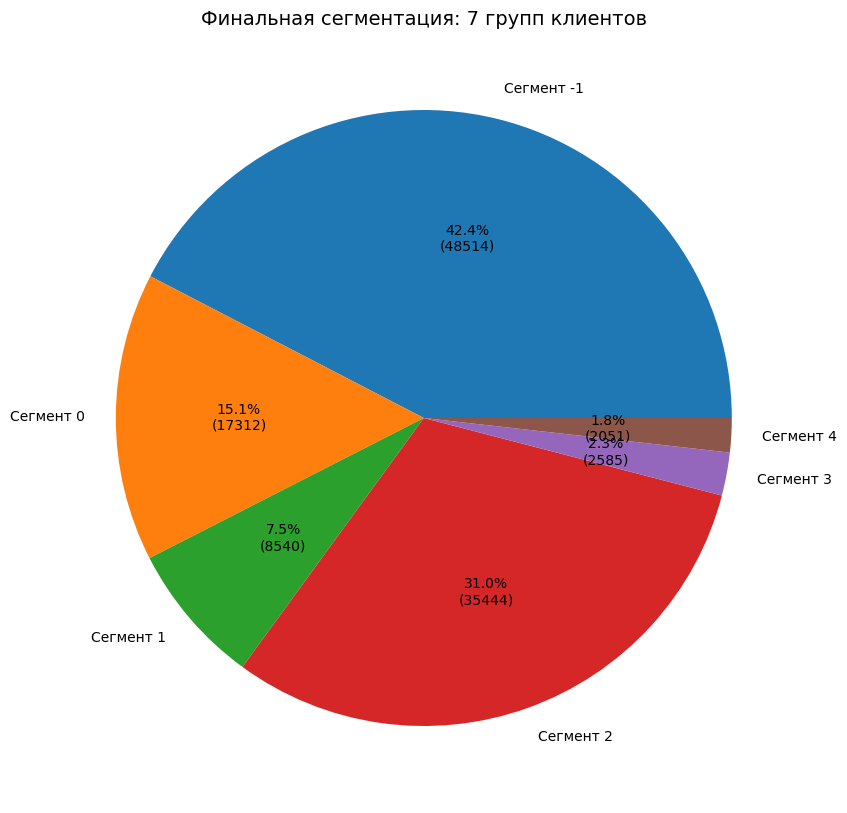

+---+------------+-------+-------+
| 0 | Сегмент -1 | 48514 | 42.39 |
| 1 | Сегмент 0  | 17312 | 15.13 |
| 2 | Сегмент 1  |  8540 |  7.46 |
| 3 | Сегмент 2  | 35444 | 30.97 |
| 4 | Сегмент 3  |  2585 |  2.26 |
| 5 | Сегмент 4  |  2051 |  1.79 |
+---+------------+-------+-------+


In [122]:
from tabulate import tabulate

cluster_counts = df['hdbscan_cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 10))
plt.pie(
    cluster_counts,
    labels=[f"Сегмент {i}" for i in cluster_counts.index],
    autopct=lambda p: f'{p:.1f}%\n({int(p*len(df)/100)})',
)

plt.title(f'Финальная сегментация: {optimal_k} групп клиентов', fontsize=14)
plt.show()

summary_table = pd.DataFrame({
    'Сегмент': [f"Сегмент {i}" for i in cluster_counts.index],
    'Количество клиентов': cluster_counts.values,
    'Доля (%)': (cluster_counts.values / len(df) * 100).round(2)
})

print(tabulate(summary_table, tablefmt='psql'))